In [3]:
import numpy as np
import pandas as pd

#datviz
import matplotlib.pyplot as plt
import seaborn as sns

#models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor

# Imbalance Sampling

from imblearn.pipeline import Pipeline

# tools
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import  mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer


import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns=38

# **Customer Lifetime Value**

## **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

In [4]:
df=pd.read_csv('data_customer_lifetime_value.csv')
df

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492
...,...,...,...,...,...,...,...,...,...,...,...
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134
5667,Luxury SUV,Extended,Offer2,Employed,Divorced,Master,7.0,239.0,1294.700423,22705.0,19160.989940


## **Business Problem Understanding**

**Context**

Customer lifetime value, atau CLV, adalah sebuah metrik yang mengukur seberapa berharga seorang pelanggan bagi suatu perusahaan. Dari nilai ini, perusahaan dapat mengidentifikasi seberapa besar pendapatan yang diperoleh dari satu pelanggan dan menjadi indikator biaya maksimal yang dapat dikeluarkan untuk mendapatkan atau mempertahankan pelanggan baru. Informasi ini memiliki signifikansi penting bagi perusahaan untuk merencanakan pemasaran yang efektif kepada pelanggan berharga serta memahami perubahan perilaku pelanggan di masa depan.


**Problem Statement**

Sebuah perusahaan asuransi kendaraan ingin meningkatkan retensi pelanggan dan memperbaiki strategi pemasaran. Mereka memutuskan untuk menggunakan analisis data dan pemodelan untuk memprediksi Customer Lifetime Value (CLV) pelanggan mereka. Kehadiran CLV sangat penting karena memberikan wawasan tentang keuntungan yang diperoleh dan biaya yang dikeluarkan untuk pelanggan.

**Goals**

Berdasarkan permasalahan tersebut, Perusahaan ingin mendeteksi nilai seorang pelanggan supaya dapat mengoptimalkan alokasi anggaran pemasaran tidak melebihi dari pendapatan yang didapat dari pelanggan. Selain itu, perusahaan ingin memahami bagaimana faktor-faktor seperti kelas kendaraan, Jenis asuransi, jenis tawaran perpanjangan, dan fitur lainnya mempengaruhi CLV pelanggan.

**Analytics Approach**

Untuk mencapai tujuan tersebut, kita akan melakukan analisis data untuk mengidentifikasi pola dan hubungan antara fitur-fitur yang ada dengan CLV pelanggan. Setelah itu, kita dapat mengembangkan model regresi yang untuk memprediksi CLV berdasarkan variabel-variabel yang diberikan. 

## **Data Understanding**

**Informasi Feature**

| **Feature** | **Tipe Data** | **Deskripsi** |
| --- | --- | --- |
| Vehicle Class | Object | Tipe Kendaaraan |
| Coverage | Object | Jenis perlindungan asuransi kendaraan |
| Renew Type Offer | Object | Tipe penawaran untuk memperbarui polis yang telah/menjadi kadaluarsa |
| EmploymentStatus | Object | Status pekerjaan pelanggan |
| Marital Status | Object | Status pernikahan pelanggan |
| Education | Object | Tingkat pendidikan pelanggan |
| Number of Policies | Float | Jumlah polis yang dimiliki pelanggan |
| Monthly Premium Auto | Float | Premi bulanan yang dibayarkan oleh tertanggung |
| Total Claim Amount | Float | Jumlah klaim sejak awal polis |
| Income | Float | Pendapatan pelanggan (dalam dolar) |
| Customer Lifetime Value | Float | Customer Lifetime Value (Target) |

In [5]:
# deep info
stats = []
for column in df.columns:
    dtype = df[column].dtype
    null_count = df[column].isnull().sum()
    null_pct = round((null_count / len(df)) * 100,2)
    unique_count = df[column].nunique()
    unique_sample = df[column].dropna().sample(min(2, unique_count)).tolist()

    stats.append({
        'Kolom Data': column,
        'Tipe Data': dtype,
        'Null': null_count,
        'nullPct(%)': null_pct,
        'unique': unique_count,
        'uniqueSample': unique_sample
    })

pd.DataFrame(stats)

,Kolom Data,Tipe Data,Null,nullPct(%),unique,uniqueSample
0,Vehicle Class,object,0,0.0,6,"[Four-Door Car, Four-Door Car]"
1,Coverage,object,0,0.0,3,"[Basic, Basic]"
2,Renew Offer Type,object,0,0.0,4,"[Offer2, Offer2]"
3,EmploymentStatus,object,0,0.0,5,"[Unemployed, Employed]"
4,Marital Status,object,0,0.0,3,"[Married, Married]"
5,Education,object,0,0.0,5,"[Bachelor, Bachelor]"
6,Number of Policies,float64,0,0.0,9,"[3.0, 1.0]"
7,Monthly Premium Auto,float64,0,0.0,191,"[140.0, 61.0]"
8,Total Claim Amount,float64,0,0.0,3274,"[41.628869, 302.733593]"
9,Income,float64,0,0.0,3625,"[0.0, 25558.0]"


## **Exploratory Data Analysis**

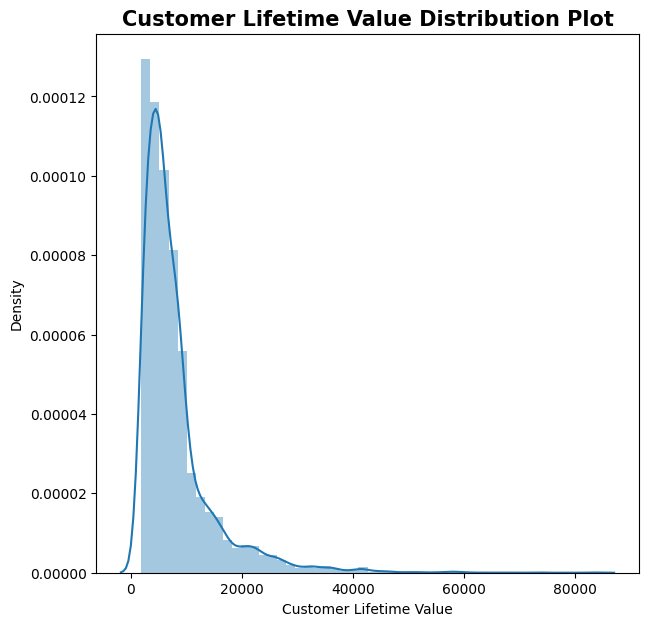

In [6]:
# Plot distribusi fitur 'price'
plt.figure(figsize=(7, 7))
sns.distplot(df['Customer Lifetime Value'])
plt.title('Customer Lifetime Value Distribution Plot', size=15,weight='bold'
          );

Berdasarkan plot distribusi CLV di atas, terlihat bahwa distribusi yang right skew yang menunjukkan banyak pelanggan dengan nilai CLV yang rendah.

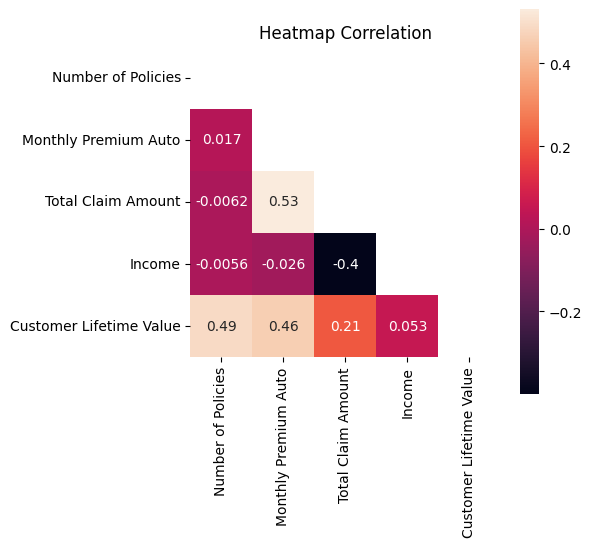

In [7]:
# Menampilkan nilai korelasi antar feature numerical vs target
num_cols = df.describe().columns

corr = df[num_cols].corr('spearman')
matrix = np.triu(corr)
plt.figure(figsize=(5,5))
sns.heatmap(corr,
            annot=True,
            square=True,
            mask=matrix)
plt.title('Heatmap Correlation')
plt.show()

Heatmap diatas memperlihatkan bahwa **jumlah polis** (`Number of Policies`) memiliki korelasi tertinggi terhadap skor CLV dengan nilai korelasi 0.49. Sedangkan **pendapatan** (`Income`) memiliki korelasi terendah terhadap Skor CLV

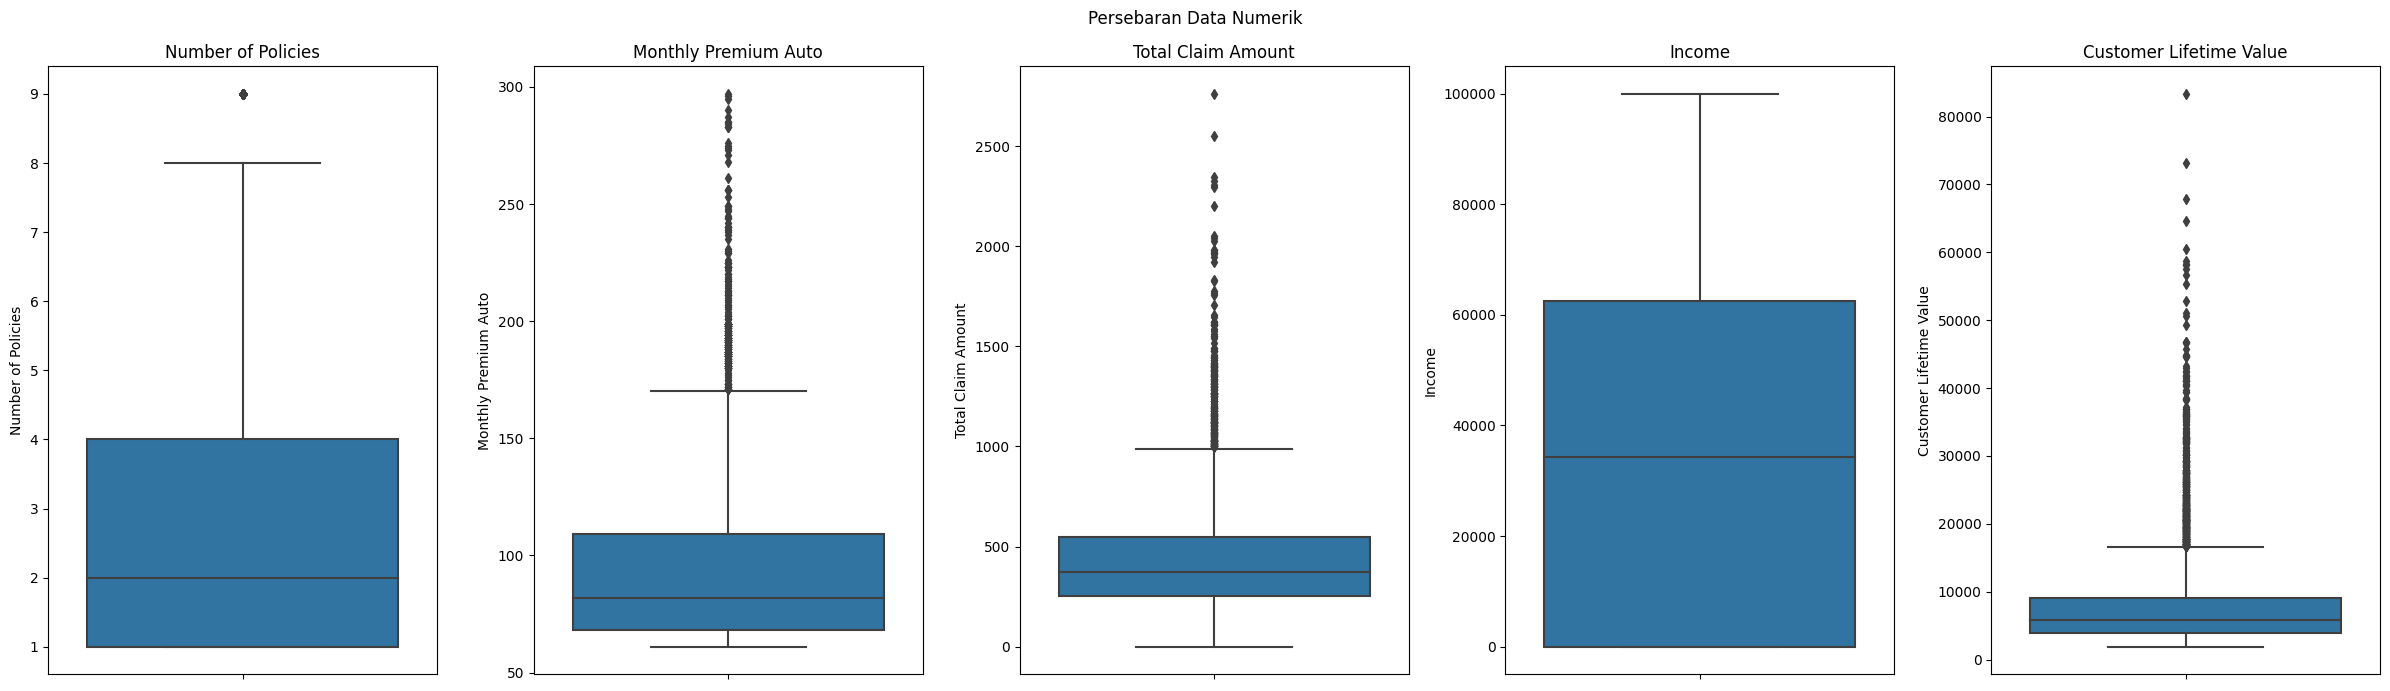

In [47]:
# Menampilkan boxplot untuk melihat outlier
plt.figure(figsize=(24,7))
num_colplot = 1

for i in num_cols:
    plt.subplot(1,5,num_colplot)
    sns.boxplot(data=df, y=i),
    plt.title(i),
    plt.suptitle('Persebaran Data Numerik')
    plt.tight_layout()
    num_colplot+=1


In [9]:
cat_cols = list(df.select_dtypes(include='object').columns)

for i in cat_cols:
    tabel = df[i].value_counts()
    tabeldf = tabel.reset_index()
    tabeldf.columns = ['Unique Value','Jumlah']
    print(tabeldf)
    print(' ')

    Unique Value  Jumlah
0  Four-Door Car    2858
1   Two-Door Car    1186
2            SUV    1096
3     Sports Car     307
4     Luxury SUV     115
5     Luxury Car     107
 
  Unique Value  Jumlah
0        Basic    3477
1     Extended    1704
2      Premium     488
 
  Unique Value  Jumlah
0       Offer1    2292
1       Offer2    1835
2       Offer3     900
3       Offer4     642
 
    Unique Value  Jumlah
0       Employed    3541
1     Unemployed    1429
2  Medical Leave     267
3       Disabled     252
4        Retired     180
 
  Unique Value  Jumlah
0      Married    3305
1       Single    1514
2     Divorced     850
 
           Unique Value  Jumlah
0              Bachelor    1703
1               College    1660
2  High School or Below    1620
3                Master     460
4                Doctor     226
 


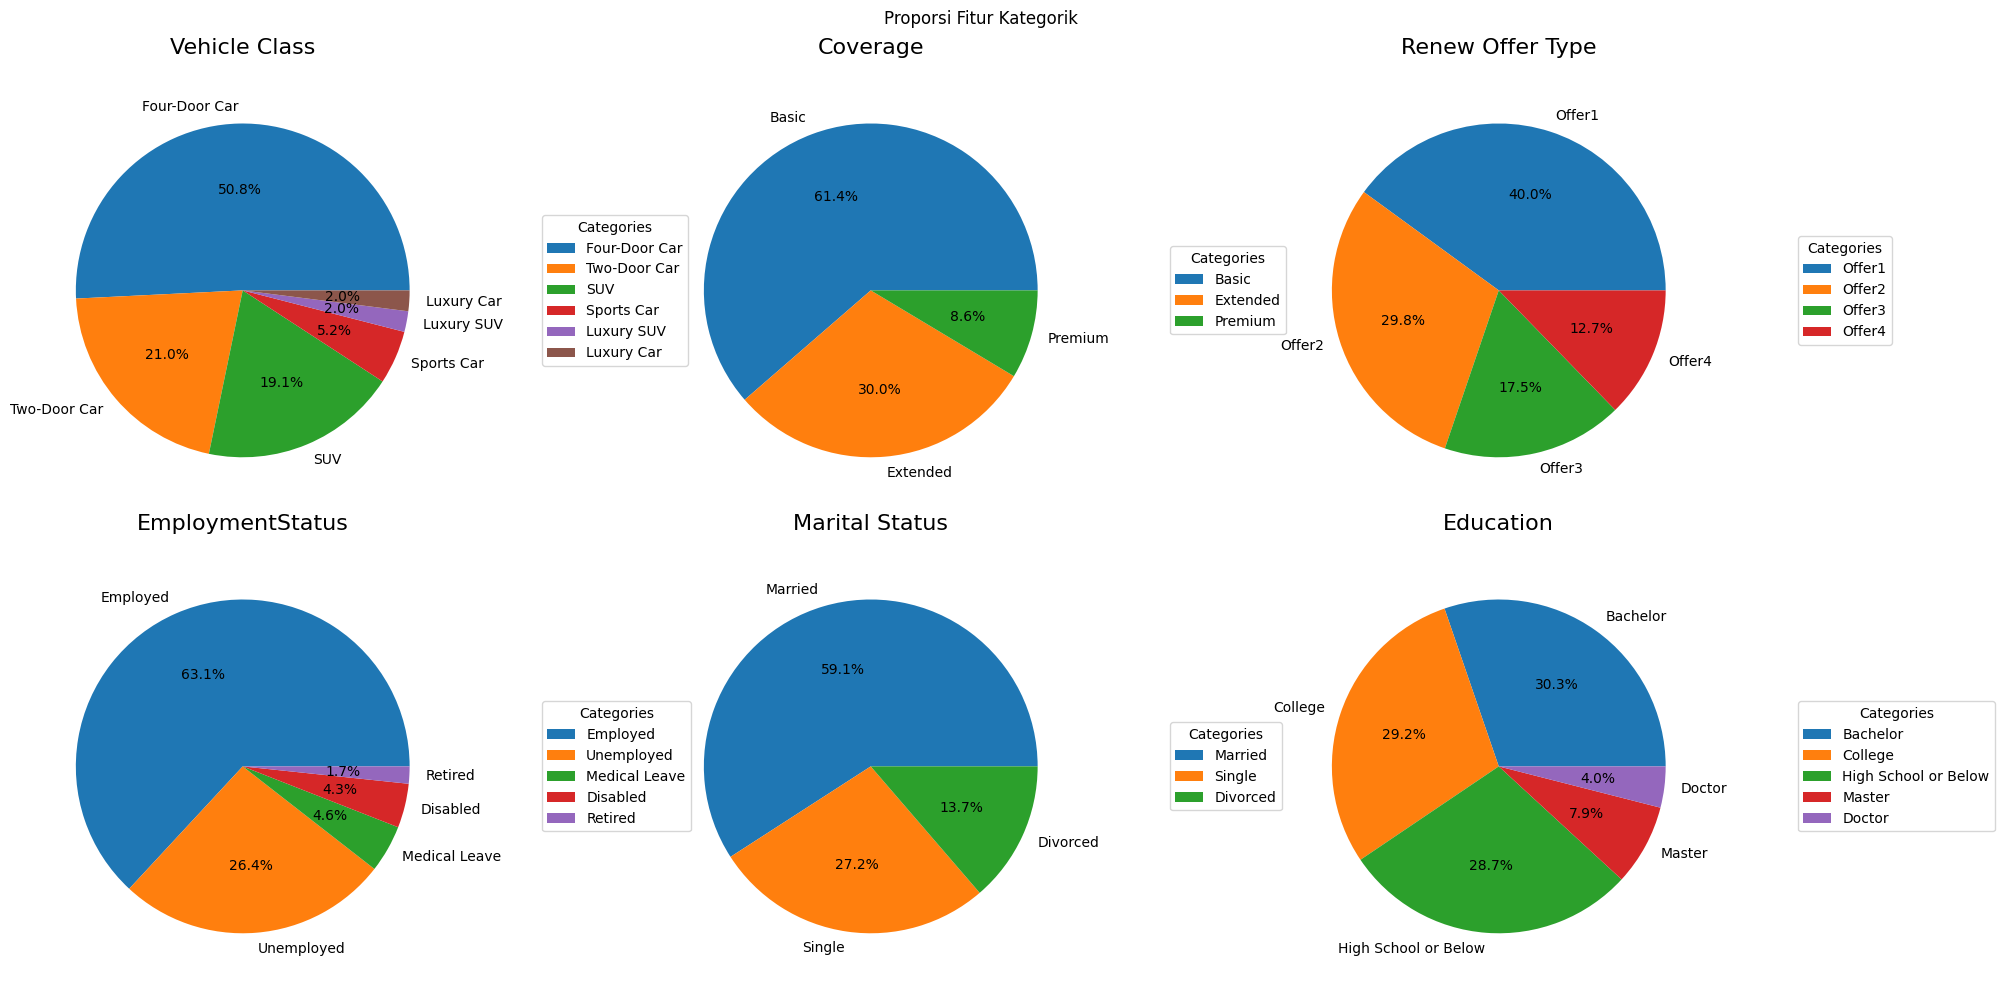

In [51]:
# import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
num_subplot = 1

for i in cat_cols:
    plt.subplot(2, 3, num_subplot)
    category_counts = df[i].value_counts()
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
    plt.title(i, size=16,pad=20)
    plt.legend(category_counts.index, title='Categories', loc='center left', bbox_to_anchor=(1.2, 0.5))  # Menambahkan legend
    num_subplot += 1

plt.suptitle('Proporsi Fitur Kategorik')
plt.tight_layout()
plt.show()


Dapat terlihat mayoritas nasabah asuransi kebanyakan memiliki gelar bachelor(1707 nasabah), sedang bekerja(3541 nasabah) dan sudah menikah(3305 nasabah). Mayoritas nasabah memiliki kendaraan Four door car dan mengambil layanan coverage basic untuk paket asuransi kendaraanya.

## **Data Preprocessing**

Data preprocessing adalah fondasi kunci dalam analisis data, di mana kita membersihkan, mengubah, dan mempersiapkan data mentah menjadi bentuk yang lebih sesuai untuk analisis. Langkah-langkah ini meliputi penghapusan data yang hilang atau duplikat, normalisasi data, dan pengkodean ulang, sehingga memastikan data yang digunakan lebih berkualitas dan relevan.

### **Handling Data Duplicates**

Mengatasi data duplikat adalah langkah penting dalam pemrosesan data karena data ganda dapat memberikan efek yang merugikan pada pemodelan. Keberadaan data duplikat dapat mengarah pada bias yang tidak diinginkan dalam analisis statistik, dan dapat menyebabkan model yang tidak akurat. Selain itu, data duplikat juga dapat mempengaruhi pengambilan keputusan yang salah karena mereka membesar-besarkan frekuensi atau bobot suatu kejadian. 

In [11]:
#mencari data duplikat

display(df[df.duplicated(keep=False)].sort_values('Customer Lifetime Value').head(10))
display(df[df.duplicated].shape[0])

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
2663,Four-Door Car,Basic,Offer1,Unemployed,Divorced,College,1.0,66.0,316.8,0.0,2004.350666
3524,Four-Door Car,Basic,Offer1,Unemployed,Divorced,College,1.0,66.0,316.8,0.0,2004.350666
2675,Four-Door Car,Basic,Offer1,Unemployed,Divorced,College,1.0,66.0,316.8,0.0,2004.350666
3673,Four-Door Car,Basic,Offer1,Unemployed,Divorced,College,1.0,66.0,316.8,0.0,2004.350666
4883,Four-Door Car,Basic,Offer1,Unemployed,Divorced,College,1.0,66.0,316.8,0.0,2004.350666
2763,Four-Door Car,Basic,Offer3,Retired,Married,High School or Below,1.0,61.0,292.8,27972.0,2227.072755
5290,Four-Door Car,Basic,Offer3,Retired,Married,High School or Below,1.0,61.0,292.8,27972.0,2227.072755
3968,Four-Door Car,Basic,Offer3,Retired,Married,High School or Below,1.0,61.0,292.8,27972.0,2227.072755
2714,Four-Door Car,Basic,Offer3,Retired,Married,High School or Below,1.0,61.0,292.8,27972.0,2227.072755
1357,Four-Door Car,Basic,Offer3,Retired,Married,High School or Below,1.0,61.0,292.8,27972.0,2227.072755


618

In [48]:
display(df[df.duplicated].shape[0])

0

Pada dataset ini, terdapat 618 data pelanggan yang merupakan salinan data pelanggan lainnya. Untuk mencegah bias dalam pemodelan, perlu menghapus data duplikat ini sebelum melakukan analisis.

In [12]:
#Drop data duplikat
df.drop_duplicates(inplace=True)

### **Handling Outlier**

Outlier adalah data yang secara signifikan berbeda dari pola umum dalam sebuah dataset. Outlier dapat muncul sebagai nilai yang jauh lebih tinggi atau lebih rendah dari nilai-nilai lain dalam dataset.
Penanganan outlier yang tepat dapat meningkatkan keakuratan analisis dan model statistik.

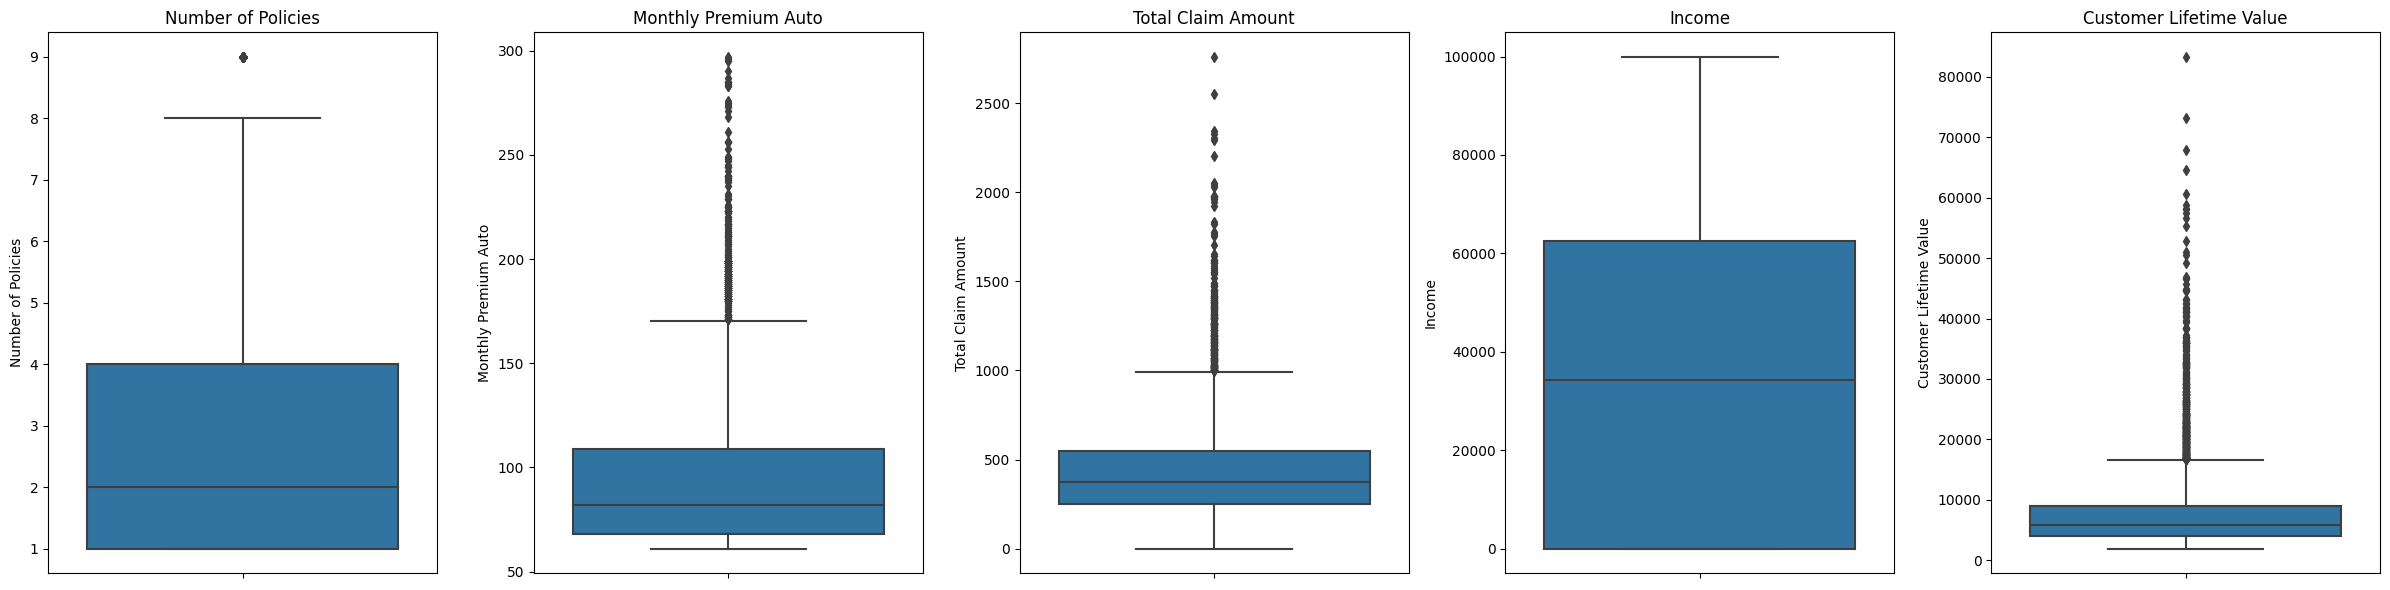

In [13]:
# Menampilkan boxplot untuk melihat outlier
plt.figure(figsize=(24,6))
num_feature = df.describe().columns
num_colplot = 1

for i in num_feature:
    plt.subplot(1,5,num_colplot)
    sns.boxplot(data=df, y=i),
    plt.title(i),
    plt.tight_layout()
    num_colplot+=1

Dalam analisis data dengan menggunakan boxplot, terdapat kolom-kolom numerik seperti `monthly premium auto`, `Total claim amount`, dan` Customer lifetime value` yang dapat menunjukkan keberadaan outlier, yaitu data yang secara signifikan berbeda dari sebagian besar observasi. Penting untuk mengatasi outlier ini agar model machine learning yang dikembangkan tidak mengalami bias dalam estimasinya. 

Lalu pada atribut `Number of Policies`, juga ditemukan menemukan data pelanggan yang memiliki 9 polis, yang secara statistik dianggap sebagai outlier berdasarkan analisis boxplot, namun karena terlihat pada upperboundnya jarak nya dekat outlier pada jumlah polis diabaikan

Namun, harus diingat bahwa penghapusan outlier secara eksklusif dari model machine learning memiliki potensi dampak negatif yang signifikan. Outlier dapat mengandung informasi yang berharga atau mencerminkan situasi yang sebenarnya ada dalam data. sehingga dalam penghapusan outlier ini akan dimaknai sebagai limitasi kemampuan model yang akan dirancang. 

In [14]:
df.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000
mean,2.992081,92.911107,429.798954,37739.838448,8059.483178
std,2.386500,34.335010,293.129102,30691.452111,6989.189674
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,251.776304,0.000000,3964.441004
50%,2.000000,82.000000,374.400000,34322.000000,5837.528088
75%,4.000000,109.000000,548.123122,62471.500000,9028.564632
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


In [15]:
# Fungsi untuk menghitung persentil dan batas atas (upper bound) dari outlier
def calculate_percentiles_and_bounds(data):
    percentiles = [90, 95, 96, 97, 98, 99]
    percentile_values = data.quantile([p / 100 for p in percentiles])
    percentile_df = pd.DataFrame({'Percentile': percentiles, 'Value': percentile_values})

    # Menghitung jumlah data di atas masing-masing persentil
    data_above_percentiles = [(data > value).sum() for value in percentile_values]
    percentile_df['Data Above'] = data_above_percentiles

    # Menghitung IQR (Interquartile Range) dan batas atas (upper bound) untuk outlier
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr * 1.5
    upper = q3 + limit
    lower = q1 - limit

    print(f'Nilai IQR : {iqr}')    
    print(f'Nilai Upperbound: {upper}')    
    print(f'Nilai Lowerbound: {lower}')

    return percentile_df



#### **Outlier Monthly Premium Auto**

In [16]:
calculate_percentiles_and_bounds(df['Monthly Premium Auto'])

Nilai IQR : 41.0
Nilai Upperbound: 170.5
Nilai Lowerbound: 6.5


,Percentile,Value,Data Above
0.90,90,130.0,498
0.95,95,170.0,252
0.96,96,185.0,193
0.97,97,191.0,147
0.98,98,198.0,95
0.99,99,221.0,51


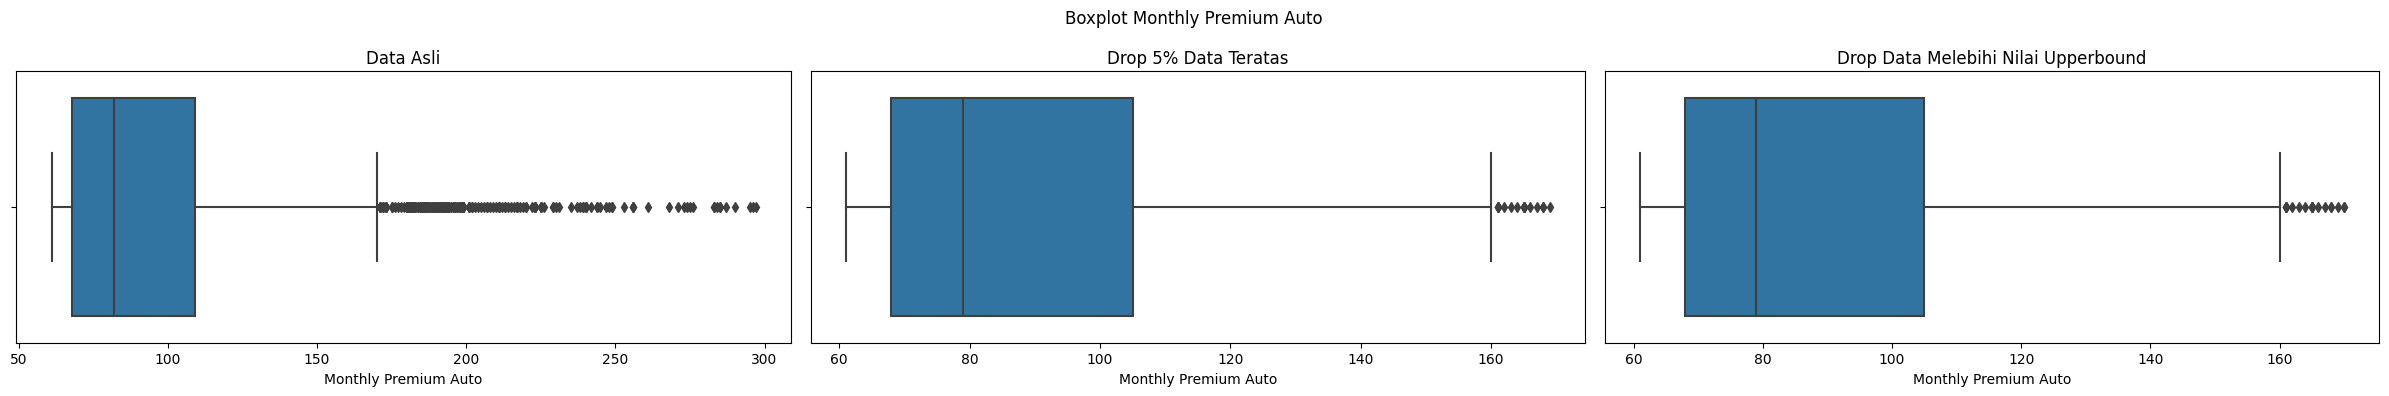

In [17]:
plt.figure(figsize=(24,4))
plt.subplot(1,3,1)
sns.boxplot(data=df, x='Monthly Premium Auto').set(title='Data Asli')

plt.subplot(1,3,2)
sns.boxplot(data=df[df['Monthly Premium Auto']<170], x='Monthly Premium Auto').set(title='Drop 5% Data Teratas')

plt.subplot(1,3,3)
sns.boxplot(data=df[df['Monthly Premium Auto']<170.5], x='Monthly Premium Auto').set(title='Drop Data Melebihi Nilai Upperbound')

plt.suptitle('Boxplot Monthly Premium Auto')
plt.tight_layout();


jika dilihat dari boxplot, Outlier Total Claim ketika drop 5% data teratas drop data melebihi nilai upper bound hampir sama drop data melebihi nilai upperbound oleh karena itu premi bulanan sejumlah 170 akan menjadi batas limitasi dalam perancangan model

#### **Outlier Total Claim Amount**

In [18]:
calculate_percentiles_and_bounds(df['Total Claim Amount'])

Nilai IQR : 296.34681750000004
Nilai Upperbound: 992.6433477500001
Nilai Lowerbound: -192.74392225000005


,Percentile,Value,Data Above
0.90,90,773.470977,505
0.95,95,957.600000,252
0.96,96,1017.600000,202
0.97,97,1122.267495,152
0.98,98,1263.325007,101
0.99,99,1418.400000,50


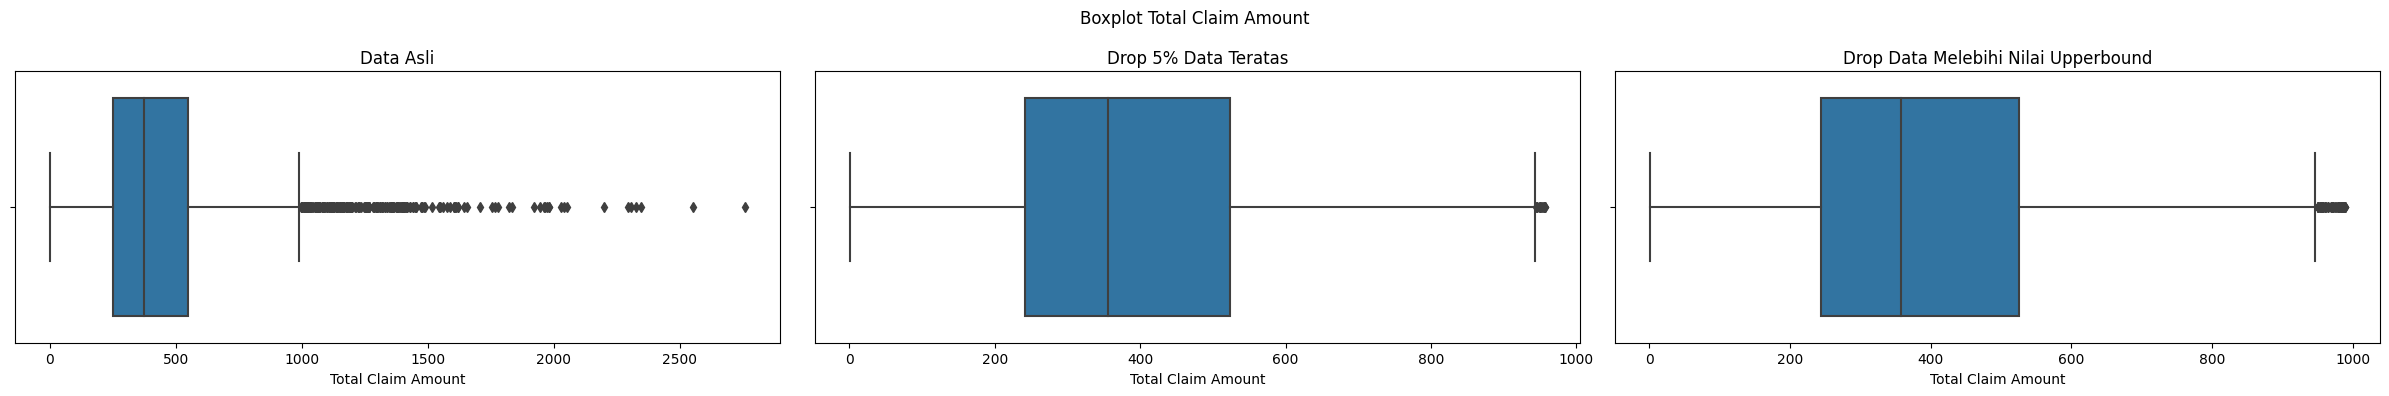

In [19]:
plt.figure(figsize=(24,4))

plt.subplot(1,3,1)
sns.boxplot(data=df, x='Total Claim Amount').set(title='Data Asli')

plt.subplot(1,3,2)
sns.boxplot(data=df[df['Total Claim Amount']<957.6], x='Total Claim Amount').set(title='Drop 5% Data Teratas')

plt.subplot(1,3,3)
sns.boxplot(data=df[df['Total Claim Amount']<992.6433477500001], x='Total Claim Amount').set(title='Drop Data Melebihi Nilai Upperbound')

plt.suptitle('Boxplot Total Claim Amount')
plt.tight_layout();

jika dilihat dari boxplot, Outlier Total Claim ketika drop 5% data teratas drop data melebihi nilai upper bound lebih sedikit darioada drop data melebihi nilai upperbound oleh karena itu  nilai total claim  sejumlah 957.6 akan menjadi batas limitasi dalam perancangan model

#### **Outlier Customer Lifetime Value**

In [20]:
calculate_percentiles_and_bounds(df['Customer Lifetime Value'])

Nilai IQR : 5064.1236284999995
Nilai Upperbound: 16624.75007525
Nilai Lowerbound: -3631.744438749999


,Percentile,Value,Data Above
0.90,90,15641.258560,505
0.95,95,21921.968055,253
0.96,96,23777.814270,202
0.97,97,26198.471025,152
0.98,98,29874.744930,101
0.99,99,36261.277600,51


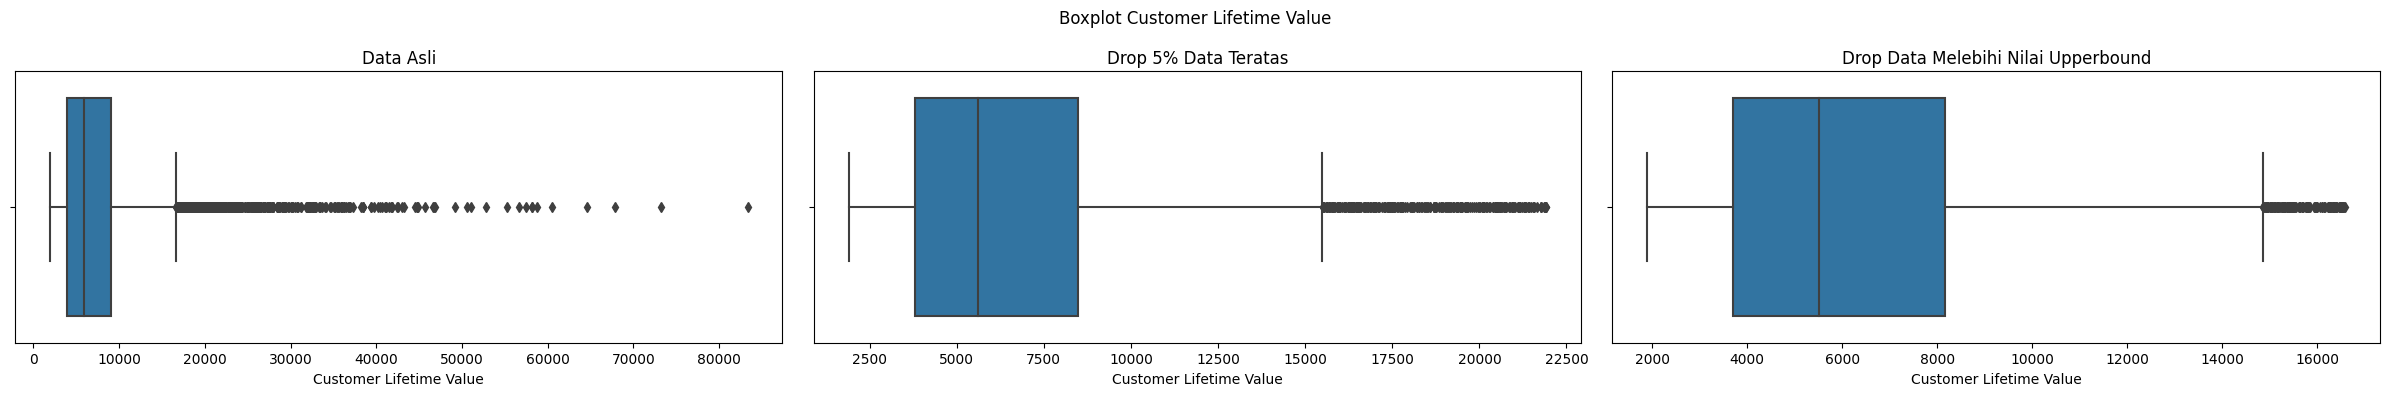

In [21]:
plt.figure(figsize=(24,4))
plt.subplot(1,3,1)
sns.boxplot(data=df, x='Customer Lifetime Value').set(title='Data Asli')

plt.subplot(1,3,2)
sns.boxplot(data=df[df['Customer Lifetime Value']<21921], x='Customer Lifetime Value').set(title='Drop 5% Data Teratas')

plt.subplot(1,3,3)
sns.boxplot(data=df[df['Customer Lifetime Value']<16624.75007525], x='Customer Lifetime Value').set(title='Drop Data Melebihi Nilai Upperbound')

plt.suptitle('Boxplot Customer Lifetime Value')
plt.tight_layout();

jika dilihat dari boxplot, Outlier ClV ketika drop data melebihi nilai upper bound sedikit apabila hanya drop 5% data teratas oleh karena itu
nilai CLV sejumlah 16624.75 akan menjadi batas limitasi dalam perancangan model

### Batasan Model

In [22]:
ddfA = df[(df['Total Claim Amount'] < 957) & (df['Monthly Premium Auto'] < 170) & (df['Customer Lifetime Value']<16624.75007525)]

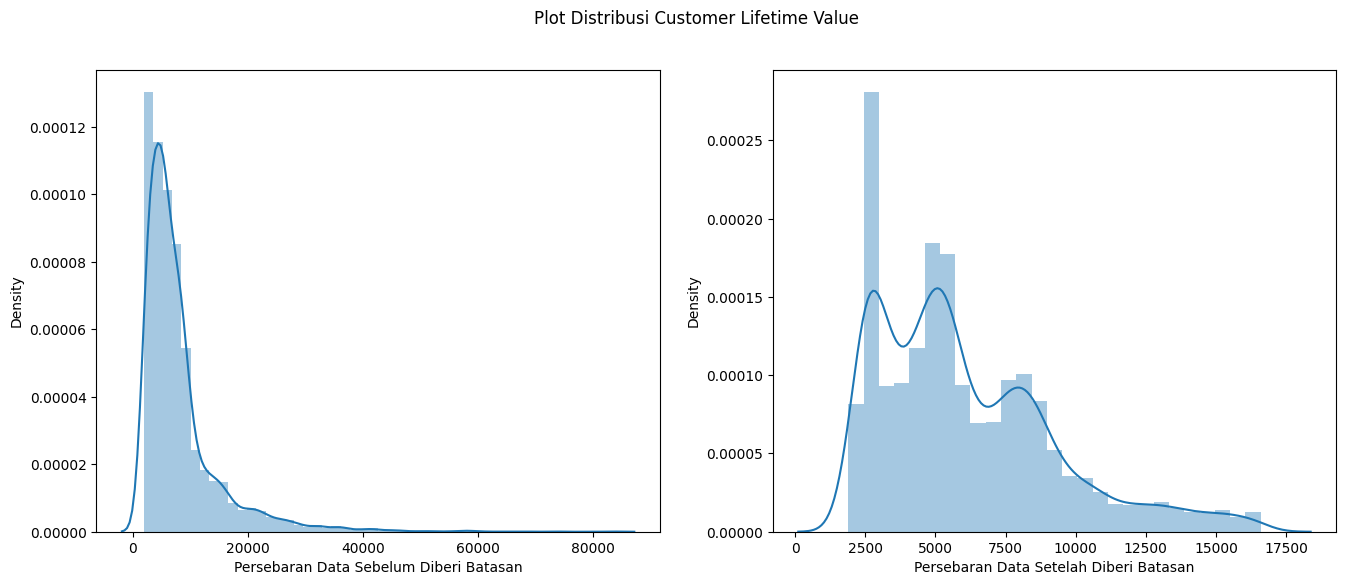

In [23]:
fig, axes = plt.subplots(1,2, figsize=(16,6))
sns.distplot(df['Customer Lifetime Value'], ax=axes[0])
sns.distplot(ddfA['Customer Lifetime Value'], ax=axes[1])
axes[0].set_xlabel('Persebaran Data Sebelum Diberi Batasan')
axes[1].set_xlabel('Persebaran Data Setelah Diberi Batasan')
plt.suptitle('Plot Distribusi Customer Lifetime Value');


### **Encoding**

Encoding adalah suatu teknik yang digunakan untuk mengubah representasi variabel kategorikal menjadi nilai numerik dalam konteks machine learning. Dalam proyek ini, digunakan dua jenis encoding: 
- > **One-hot encoding** untuk fitur kategori nominal dengan sedikit unique value dan tanpa urutan.<br>
fitur :`Vehicle Class`, `EmploymentStatus`, `Renew Offer type`, `Marital Status` 
- > **Ordinal encoding** untuk fitur kategori ordinal dengan nilai yang memiliki tingkatan atau urutan tertentu.<br>
fitur: `Coverage`, `Education`

In [24]:
# Ordinal mapping
ordinal_mapping = [
    {'col':'Coverage', 'mapping':{'Basic':1, 'Extended':2, 'Premium':3, None:0}},
    {'col':'Education', 'mapping':{'High School or Below':1, 'College':2, 'Bachelor':3, 'Master':4, 'Doctor':5, None:0}}
]

# Menggabungkan encoder dalam column transformer
transformer = ColumnTransformer([
    ('Scaler', RobustScaler(), ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income']),
    ('ordinal', ce.OrdinalEncoder(
        cols=['Coverage', 'Education'],
        mapping=ordinal_mapping), 
        ['Coverage', 'Education']
        ),
    ('onehot', OneHotEncoder(
        drop='first'),
        ['Vehicle Class', 'EmploymentStatus', 'Renew Offer Type', 'Marital Status']
        ),
    
    
    
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('Scaler', RobustScaler(),
                                 ['Number of Policies', 'Monthly Premium Auto',
                                  'Total Claim Amount', 'Income']),
                                ('ordinal',
                                 OrdinalEncoder(cols=['Coverage', 'Education'],
                                                mapping=[{'col': 'Coverage',
                                                          'data_type': dtype('O'),
                                                          'mapping': Basic       1
Extended    2
Premium     3
None        0
dtype: int64},
                                                         {'col': 'Education',
                                                          'data_type': dtype('O'),
                                                          'mapping': High School or Below    1
College                 2
Bachelor                3
Master                  4
Doctor                  5
None                    0
dtype: int64}]),
                                 ['Coverage', 'Education']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['Vehicle Class', 'EmploymentStatus',
                                  'Renew Offer Type', 'Marital Status'])])

### **Data Splitting**

In [25]:
# define x dan y
x = ddfA.drop(columns='Customer Lifetime Value')
y = ddfA['Customer Lifetime Value']

# Membagi data train dan test dengan proporsi 4:1
xtrain, xtest, ytrain, ytest = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=1917
)

## **Modeling**

### **Memilih Benchmark Model**

Pada tahap awal, kami akan melakukan pemodelan pada 8 model benchmark yang telah dipilih yaitu: 
- Linear Regression 
- KNN Regressor 
- Support Vector Regressor
- Decision Tree
- Random Forest 
- XGBoost
- AdaBoost
- Gradient Boost. 

Evaluasi kinerja model-model benchmark ini akan berdasarkan pada tiga metrik evaluasi yang telah kami pilih, yaitu RMSE (Root Mean Square Error), MAE (Mean Absolute Error), dan MAPE (Mean Absolute Percentage Error). Alasan memilih ketiga metrik ini adalah untuk membandingkan sejauh mana performa model dengan memeriksa seberapa baik model tersebut dalam mengurangi kesalahan prediksi.

In [26]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
svr = SVR()
dt = DecisionTreeRegressor(random_state= 2)
rf = RandomForestRegressor(random_state= 2)
xgb = XGBRegressor(random_state= 2)
ada = AdaBoostRegressor(random_state= 2)
gbr = GradientBoostingRegressor(random_state= 2)

model = [lr,knn,svr,dt,rf,xgb,ada,gbr]

scoreRMSE = []
meanRMSE = []
stdRMSE = []

scoreMAE = []
meanMAE = []
stdMAE = []

scoreMAPE = []
meanMAPE= []
stdMAPE = []

scaler = RobustScaler()

scoring = {'MAE': 'neg_mean_absolute_error',
           'MAPE': 'neg_mean_absolute_percentage_error',
           'RMSE': 'neg_root_mean_squared_error'
}

for i in model:

    crossval =StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

    model = Pipeline([
        ('Preprocess', transformer),
        # ('Balance', scaler),
        ('model', i)
        ])

    cv_scores = cross_validate(model, xtrain, ytrain, scoring=scoring, cv=5)

    # RMSE Score
    scoreRMSE.append(cv_scores['test_RMSE'])
    meanRMSE.append(cv_scores['test_RMSE'].mean())
    stdRMSE.append(cv_scores['test_RMSE'].std())

    # MAE Score
    scoreMAE.append(cv_scores['test_MAE'])
    meanMAE.append(cv_scores['test_MAE'].mean())
    stdMAE.append(cv_scores['test_MAE'].std())

    # MAPE Score
    scoreMAPE.append(cv_scores['test_MAPE'])
    meanMAPE.append(cv_scores['test_MAPE'].mean())
    stdMAPE.append(cv_scores['test_MAPE'].std())

In [27]:
model

Pipeline(steps=[('Preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Scaler', RobustScaler(),
                                                  ['Number of Policies',
                                                   'Monthly Premium Auto',
                                                   'Total Claim Amount',
                                                   'Income']),
                                                 ('ordinal',
                                                  OrdinalEncoder(cols=['Coverage',
                                                                       'Education'],
                                                                 mapping=[{'col': 'Coverage',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Basic       1
Extended    2
Premium     3
None        0
dtype: int64},
                                                                          {'col': 'Education',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': High School or Below    1
College                 2
Bachelor                3
Master                  4
Doctor                  5
None                    0
dtype: int64}]),
                                                  ['Coverage', 'Education']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Vehicle Class',
                                                   'EmploymentStatus',
                                                   'Renew Offer Type',
                                                   'Marital Status'])])),
                ('model', GradientBoostingRegressor(random_state=2))])

In [28]:
cv0 =pd.DataFrame({
    'Model': ['Linear Regression',
              'KNN Regressor',
              'SVR',
              'DecisionTree Regressor',
              'RandomForest Regressor',
              'XGBoost Regressor',
              'AdaBoost Regressor',
              'Gradient Boosting Regressor'
              ],
    'Mean_RMSE': meanRMSE,
    'Std_RMSE': stdRMSE,
    'Mean_MAE': meanMAE,
    'Std_MAE': stdMAE,
    'Mean_MAPE': meanMAPE,
    'Std_MAPE': stdMAPE
})

cv0

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-2749.680998,68.191962,-2033.445885,57.041862,-0.386075,0.008621
1,KNN Regressor,-2753.788042,44.910043,-1883.241845,41.035566,-0.358015,0.009349
2,SVR,-3222.310549,60.888720,-2404.408514,46.024468,-0.440361,0.004892
3,DecisionTree Regressor,-1322.366071,92.126685,-462.136399,34.722389,-0.057490,0.003806
4,RandomForest Regressor,-977.957002,49.731108,-383.585150,18.548604,-0.046171,0.001973
5,XGBoost Regressor,-1017.046499,58.802780,-454.692195,17.436297,-0.067456,0.004257
6,AdaBoost Regressor,-1247.170677,46.228970,-802.880509,25.103909,-0.117172,0.003331
7,Gradient Boosting Regressor,-915.736035,50.692904,-379.133043,13.044193,-0.049695,0.001500


Proses Benchmarking ini menunjukkan bahwa Gradient Boost adalah model terbaik berdasarkan nilai RMSE dan MAE, . Sedangkan jika dari nilai MAPE, RandomForest memiliki nilai paling baik.

### **Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model Gradien Boost dan Random Forest

Gradient Boost Regressor adalah algoritma machine learning yang digunakan untuk membangun model regresi.
 - Algoritma ini bekerja dengan memperbaiki kesalahan prediksi model sebelumnya dengan membuat model baru yang fokus pada kesalahan tersebut.
 - Pohon keputusan adalah model yang sering digunakan dalam Gradient Boost Regressor, di mana setiap pohon memperbaiki prediksi kesalahan pohon sebelumnya.
 - Algoritma ini beroperasi secara iteratif, menambahkan model-model baru untuk memperbaiki kesalahan prediksi sebelumnya, dengan tujuan menghasilkan prediksi yang lebih akurat.
 - Gradient Boost Regressor memiliki parameter seperti learning rate, jumlah pohon, dan kedalaman pohon yang dapat diatur untuk mengoptimalkan kinerja model.

Random Forest Regressor
 - Algoritma ini berdasarkan konsep pohon keputusan, tetapi memanfaatkan sekumpulan pohon keputusan (ensemble) untuk membuat prediksi regresi.
 - Proses pembuatan model melibatkan pembangunan banyak pohon keputusan secara acak (random) dan menggabungkan hasil prediksi dari masing-masing pohon.
 - Setiap pohon dalam Random Forest Regressor memilih subset acak dari fitur dan data pelatihan untuk meminimalkan overfitting dan meningkatkan keberagaman model.
 - Prediksi regresi akhir diperoleh dengan menggabungkan prediksi dari semua pohon

In [29]:
models = {
    'Gradien Boosting': GradientBoostingRegressor(random_state= 2),
    'RandomForest': RandomForestRegressor(random_state=2)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:
    model = Pipeline([
        ('preprocessing', transformer),
        # ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    score_rmse.append(np.sqrt(mean_squared_error(ytest, y_pred)))
    score_mae.append(mean_absolute_error(ytest, y_pred))
    score_mape.append(mean_absolute_percentage_error(ytest, y_pred))

preTuningScore = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
preTuningScore

,RMSE,MAE,MAPE
Gradien Boosting,1003.458666,389.759263,0.048280
RandomForest,1054.285517,375.909662,0.043843


### **Hyperparameter Tuning**

Sebagai usaha untuk meningkatkan kualitas model, maka dilakukan penyetelan hyperparameter kepada dua model yang telah diuji sebelumnya. Melalui proses ini, kami berupaya memaksimalkan kinerja model demi menghasilkan prediksi yang lebih akurat

##### **Random Forest**

Berikut adalah penjelasan mengenai hyperparameter yang digunakan dalam Random Forest Regressor:

- `n_estimators`: Ini adalah jumlah pohon dalam ensemble Random Forest. Anda dapat mengatur berapa banyak pohon yang akan digunakan dalam model Anda. Menggunakan lebih banyak pohon dapat meningkatkan kestabilan model, tetapi juga memerlukan lebih banyak sumber daya komputasi.

- `max_depth`: Hyperparameter ini mengontrol kedalaman maksimum dari setiap pohon keputusan dalam ensemble. Nilai `None` berarti tidak ada batasan kedalaman. Mengatur kedalaman maksimum dapat membantu mencegah overfitting.

- `min_samples_split`: Ini adalah jumlah minimum sampel yang diperlukan dalam sebuah simpul internal untuk memutuskan pembagian. Memilih nilai yang lebih tinggi dapat membantu menghindari overfitting.

- `min_samples_leaf`: Ini adalah jumlah minimum sampel yang diperlukan untuk sebuah simpul menjadi daun (leaf node). Sama seperti `min_samples_split`, mengatur nilai yang lebih tinggi dapat membantu menghindari overfitting.

- `max_features`: Hyperparameter ini mengontrol jumlah fitur yang akan dipertimbangkan saat membagi simpul. 'auto' berarti jumlah fitur yang akan dipertimbangkan adalah akar kuadrat dari jumlah fitur yang tersedia, sedangkan 'sqrt' adalah pilihan lain yang serupa. Anda juga dapat menyebutkan jumlah fitur secara eksplisit jika Anda ingin mengatur jumlahnya.

- `bootstrap`: Ini mengontrol apakah pengambilan sampel dengan penggantian (bootstrapping) digunakan saat melatih setiap pohon dalam ensemble. Jika diatur ke `True`, maka setiap pohon akan dilatih pada subset acak dari data pelatihan, yang membantu dalam menciptakan variasi di antara pohon-pohon. Jika diatur ke `False`, maka semua data pelatihan akan digunakan untuk melatih setiap pohon.

In [30]:
# Hyperparam space Random Forest
hyperparam_space_rf = {
    'model__n_estimators': [50, 100, 150],  # Jumlah pohon dalam ensemble
    'model__max_depth': [None, 10, 20, 30],  # Kedalaman maksimum pohon (None berarti tidak ada batasan)
    'model__min_samples_split': [2, 5, 10],  # Minimum jumlah sampel yang diperlukan untuk membagi simpul internal
    'model__min_samples_leaf': [1, 2, 4],  # Minimum jumlah sampel yang diperlukan untuk menjadi daun
    'model__max_features': ['auto', 'sqrt'],  # Jumlah fitur yang dipertimbangkan untuk pemisahan node
    'model__bootstrap': [True, False],  # Apakah pengambilan sampel dengan penggantian (bootstrapping) digunakan
}

# Membuat Pipleine
pipeline_rf = Pipeline([
        ('preprocessing', transformer),
        # ('scaler', scaler),
        ('model', rf)
        ])

#menentukan cross validasi
crossval = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
grid_rf = GridSearchCV(
    estimator= pipeline_rf, 
    param_grid = hyperparam_space_rf,
    cv = 5, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error',
    verbose=1
)

In [31]:
# Fitting data training untuk mencari parameter terbaik
grid_rf.fit(xtrain, ytrain)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Scaler',
                                                                         RobustScaler(),
                                                                         ['Number '
                                                                          'of '
                                                                          'Policies',
                                                                          'Monthly '
                                                                          'Premium '
                                                                          'Auto',
                                                                          'Total '
                                                                          'Claim '
                                                                          'Amount',
                                                                          'Income']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(cols=['Coverage',
                                                                                              'Education'],
                                                                                        mapping=[{'col': 'Coverage',
                                                                                                  'data_type': dtype('O'),
                                                                                                  'mapping': Basic       1
Ext...
             param_grid={'model__bootstrap': [True, False],
                         'model__max_depth': [None, 10, 20, 30],
                         'model__max_features': ['auto', 'sqrt'],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [50, 100, 150]},
             refit='neg_root_mean_squared_error',
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error'],
             verbose=1)

In [32]:
ggrfdf=pd.DataFrame(grid_rf.cv_results_).sort_values(\
    by=['rank_test_neg_root_mean_squared_error','rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error'])
ggrfdf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__bootstrap,param_model__max_depth,param_model__max_features,param_model__min_samples_leaf,param_model__min_samples_split,param_model__n_estimators,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
78,0.816152,0.046645,0.023763,0.006998,True,10,auto,4,10,50,"{'model__bootstrap': True, 'model__max_depth':...",-894.809809,-941.700819,-1019.326818,-975.685831,-838.325030,-933.969661,62.876456,1,-352.142365,-374.525650,-371.806673,-398.346133,-338.344859,-367.033136,20.514290,7,-0.042101,-0.044146,-0.042826,-0.048237,-0.042128,-0.043887,0.002298,7
80,2.315252,0.047035,0.046005,0.004531,True,10,auto,4,10,150,"{'model__bootstrap': True, 'model__max_depth':...",-900.300559,-947.589363,-1018.021461,-964.382581,-840.979026,-934.254598,59.925967,2,-351.610342,-378.965079,-374.010162,-393.346447,-338.252011,-367.236808,19.745627,9,-0.041993,-0.044617,-0.043169,-0.047585,-0.042041,-0.043881,0.002084,5
74,2.357612,0.043434,0.046102,0.002169,True,10,auto,4,2,150,"{'model__bootstrap': True, 'model__max_depth':...",-899.293090,-949.514110,-1016.993334,-965.754295,-840.929670,-934.496900,60.003896,3,-351.343067,-378.816487,-373.456326,-392.283498,-338.227285,-366.825333,19.459830,3,-0.042016,-0.044607,-0.043151,-0.047413,-0.042023,-0.043842,0.002023,3
77,2.405022,0.090744,0.037590,0.005884,True,10,auto,4,5,150,"{'model__bootstrap': True, 'model__max_depth':...",-899.293090,-949.514110,-1016.993334,-965.754295,-840.929670,-934.496900,60.003896,3,-351.343067,-378.816487,-373.456326,-392.283498,-338.227285,-366.825333,19.459830,3,-0.042016,-0.044607,-0.043151,-0.047413,-0.042023,-0.043842,0.002023,3
73,1.562536,0.012555,0.031398,0.000213,True,10,auto,4,2,100,"{'model__bootstrap': True, 'model__max_depth':...",-899.302126,-944.131652,-1018.230918,-967.953610,-843.166410,-934.556943,59.671565,5,-352.493080,-375.616246,-372.827420,-392.949021,-338.864027,-366.549959,18.881850,1,-0.042170,-0.044227,-0.043057,-0.047514,-0.042190,-0.043831,0.001988,1


In [33]:
print('Random Forest by GridSearchCV')
print('Best_score:', grid_rf.best_score_)
print('Best_params:', grid_rf.best_params_)

Random Forest by GridSearchCV
Best_score: -933.9696610801609
Best_params: {'model__bootstrap': True, 'model__max_depth': 10, 'model__max_features': 'auto', 'model__min_samples_leaf': 4, 'model__min_samples_split': 10, 'model__n_estimators': 50}


Parameter Terbaik dari pencarian GridSearch Random Forest:
- bootstrap: True
- max__depth: 10
- max_features: auto
- n_estimators: 50
- min_samples_leaf': 4, '
- min_samples_split: 10

##### **Gradien Boost**

Berikut penjelasan singkat tentang hyperparameter yang digunakan dalam model Gradient Boost:

- `n_estimators` : Ini adalah jumlah pohon dalam ensemble Gradient Boosting Regressor. Mengatur jumlah pohon ini mempengaruhi kompleksitas model dan bias-variance trade-off. Memilih nilai yang lebih tinggi dapat meningkatkan kinerja model, tetapi dengan peningkatan waktu pelatihan.

- `learning_rate` : Hyperparameter ini mengontrol sejauh mana setiap pohon berkontribusi dalam memperbaiki kesalahan prediksi sebelumnya. Lebih rendahnya tingkat pembelajaran (learning rate) dapat menghasilkan model yang lebih kuat, tetapi juga bisa memerlukan lebih banyak pohon.

- `max_depth` : Ini adalah kedalaman maksimum dari pohon-pohon keputusan dalam ensemble. Mengatur kedalaman ini memengaruhi kompleksitas setiap pohon. Kedalaman yang lebih dalam dapat menyebabkan overfitting.

- `min_samples_split`: Parameter ini menentukan jumlah minimum sampel yang diperlukan untuk membagi simpul internal (node) dalam pohon keputusan. Nilai yang lebih tinggi dapat mengendalikan kompleksitas model dan mencegah overfitting.

- `min_samples_leaf` : Ini adalah jumlah minimum sampel yang diperlukan untuk sebuah simpul menjadi daun (leaf) dalam pohon. Nilai yang lebih tinggi dapat mengendalikan kompleksitas model dan mencegah overfitting.

- `subsample` : Ini adalah fraksi dari data pelatihan yang akan digunakan untuk melatih setiap pohon dalam ensemble. Penggunaan subsample kurang dari 1.0 dapat memperkenalkan unsur acak dalam pelatihan dan membantu mengurangi overfitting.

In [34]:
# Hyperparameter space GBR
hyperparam_space_gb = {
    'model__n_estimators': [100, 125, 150],  # Jumlah pohon dalam ensemble
    'model__learning_rate': [0.05, 0.075, 0.1],  # Tingkat pembelajaran
    'model__max_depth': [3, 4, 5],  # Kedalaman maksimum pohon
    'model__min_samples_split': [2, 5, 10],  # Minimum jumlah sampel yang diperlukan untuk membagi simpul internal
    'model__min_samples_leaf': [1, 2, 4],  # Minimum jumlah sampel yang diperlukan untuk menjadi daun
    'model__subsample': [0.8, 0.9, 1.0],  # Fraksi sampel yang digunakan untuk pelatihan setiap pohon
}
# Membuat algorithm chains
pipe_gbr = Pipeline([
    ('prep', transformer),
    # ('scaler', scaler),
    ('model', gbr)
])

# Hyperparameter tuning dengan GridSearch
grid_gbr = GridSearchCV(
    estimator=pipe_gbr,
    param_grid= hyperparam_space_gb,
    cv= 5,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    refit = 'neg_root_mean_squared_error',
    n_jobs= -1,                          
    verbose= 1,
)

In [35]:
grid_gbr.fit(xtrain, ytrain)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Scaler',
                                                                         RobustScaler(),
                                                                         ['Number '
                                                                          'of '
                                                                          'Policies',
                                                                          'Monthly '
                                                                          'Premium '
                                                                          'Auto',
                                                                          'Total '
                                                                          'Claim '
                                                                          'Amount',
                                                                          'Income']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(cols=['Coverage',
                                                                                              'Education'],
                                                                                        mapping=[{'col': 'Coverage',
                                                                                                  'data_type': dtype('O'),
                                                                                                  'mapping': Basic       1
Extended    2
Pre...
             param_grid={'model__learning_rate': [0.05, 0.075, 0.1],
                         'model__max_depth': [3, 4, 5],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100, 125, 150],
                         'model__subsample': [0.8, 0.9, 1.0]},
             refit='neg_root_mean_squared_error',
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error'],
             verbose=1)

In [36]:
ggbrdf=pd.DataFrame(grid_gbr.cv_results_).sort_values(\
    by=['rank_test_neg_root_mean_squared_error','rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error'])
ggbrdf.head(20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__max_depth,param_model__min_samples_leaf,param_model__min_samples_split,param_model__n_estimators,param_model__subsample,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
298,0.823702,0.012102,0.023279,0.006994,0.075,3,4,2,100,0.9,"{'model__learning_rate': 0.075, 'model__max_de...",-902.048198,-903.798460,-984.161214,-927.899431,-818.093647,-907.200190,53.534192,1,-358.899519,-376.880903,-376.685071,-383.925532,-336.472111,-366.572627,17.173020,90,-0.045452,-0.046138,-0.046878,-0.049120,-0.044243,-0.046366,0.001627,147
307,0.783002,0.012387,0.025691,0.008127,0.075,3,4,5,100,0.9,"{'model__learning_rate': 0.075, 'model__max_de...",-902.048198,-903.798460,-984.161214,-927.899431,-818.093647,-907.200190,53.534192,1,-358.899519,-376.880903,-376.685071,-383.925532,-336.472111,-366.572627,17.173020,90,-0.045452,-0.046138,-0.046878,-0.049120,-0.044243,-0.046366,0.001627,147
316,0.786262,0.020679,0.024858,0.007233,0.075,3,4,10,100,0.9,"{'model__learning_rate': 0.075, 'model__max_de...",-901.712550,-906.462487,-985.308643,-928.982665,-818.093647,-908.111998,53.929369,3,-359.121349,-377.590051,-377.353096,-385.363195,-336.472111,-367.179960,17.609122,109,-0.045606,-0.046234,-0.046899,-0.049258,-0.044243,-0.046448,0.001656,156
79,1.303378,0.037115,0.026771,0.010178,0.05,3,4,10,150,0.9,"{'model__learning_rate': 0.05, 'model__max_dep...",-904.620463,-905.984590,-984.619928,-927.547767,-819.715096,-908.497569,53.030554,4,-357.282824,-376.402655,-380.500606,-381.717001,-338.930564,-366.966730,16.550394,102,-0.044651,-0.046336,-0.047546,-0.048244,-0.044417,-0.046239,0.001522,131
80,1.326579,0.057078,0.017133,0.001157,0.05,3,4,10,150,1.0,"{'model__learning_rate': 0.05, 'model__max_dep...",-898.722044,-905.446942,-987.344982,-931.065198,-820.264248,-908.568683,54.066946,5,-360.699908,-376.427052,-381.446005,-382.830476,-334.993836,-367.279455,17.954696,113,-0.045721,-0.046622,-0.047931,-0.048720,-0.043810,-0.046561,0.001721,167
62,1.373439,0.081197,0.022547,0.006328,0.05,3,4,2,150,1.0,"{'model__learning_rate': 0.05, 'model__max_dep...",-898.404739,-905.755610,-987.549658,-931.301431,-820.600869,-908.722461,54.044814,6,-359.541538,-375.978330,-381.096450,-384.420879,-335.248279,-367.257095,18.145398,111,-0.045392,-0.046551,-0.047937,-0.048977,-0.043889,-0.046549,0.001802,162
71,1.263081,0.061460,0.018684,0.002334,0.05,3,4,5,150,1.0,"{'model__learning_rate': 0.05, 'model__max_dep...",-898.404739,-905.755610,-987.549658,-931.301431,-820.600869,-908.722461,54.044814,6,-359.541538,-375.978330,-381.096450,-384.420879,-335.248279,-367.257095,18.145398,111,-0.045392,-0.046551,-0.047937,-0.048977,-0.043889,-0.046549,0.001802,162
61,1.252154,0.041172,0.019413,0.003372,0.05,3,4,2,150,0.9,"{'model__learning_rate': 0.05, 'model__max_dep...",-903.805657,-906.563849,-985.700408,-928.312190,-819.308734,-908.738168,53.540657,8,-357.069173,-375.084651,-381.315165,-382.192054,-339.420361,-367.016281,16.494487,104,-0.044542,-0.045889,-0.047597,-0.048155,-0.044646,-0.

In [37]:
print('Gradient Boost by GridSearchCV')
print('Best_score:', grid_gbr.best_score_)
print('Best_params:', grid_gbr.best_params_)

Gradient Boost by GridSearchCV
Best_score: -907.2001899035937
Best_params: {'model__learning_rate': 0.075, 'model__max_depth': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 2, 'model__n_estimators': 100, 'model__subsample': 0.9}


Best parameter GridSearch Gradient Boost:
- learning_rate: 0.75
- max_depth: 3
- min_samples_leaf': 4
- min_samples_split': 2
- n_estimators': 100
- subsample': 0.9

### **Predict Test Set with Tuned Model**

In [38]:
# Define model gradien boost terhadap estimator terbaik (via GridSearch)
gbr_tuning = grid_gbr.best_estimator_

# Fitting model
gbr_tuning.fit(xtrain, ytrain)

# Predict test set
y_pred_gbr_tuning = gbr_tuning.predict(xtest)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_gbr_tuning = np.sqrt(mean_squared_error(ytest, y_pred_gbr_tuning))
mae_gbr_tuning = mean_absolute_error(ytest, y_pred_gbr_tuning)
mape_gbr_tuning = mean_absolute_percentage_error(ytest, y_pred_gbr_tuning)

score_after_tuning_gbr = pd.DataFrame({'RMSE': rmse_gbr_tuning, 'MAE': mae_gbr_tuning, 'MAPE': mape_gbr_tuning}, index= ['gbr'])
score_after_tuning_gbr

,RMSE,MAE,MAPE
gbr,1003.457946,382.478705,0.046523


In [39]:
# Define model random forest terhadap estimator terbaik (via GridSearch)
rf_tuning = grid_rf.best_estimator_

# Fitting model
rf_tuning.fit(xtrain, ytrain)

# Predict test set
y_pred_rf_tuning = rf_tuning.predict(xtest)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_rf_tuning = np.sqrt(mean_squared_error(ytest, y_pred_rf_tuning))
mae_rf_tuning = mean_absolute_error(ytest, y_pred_rf_tuning)
mape_rf_tuning = mean_absolute_percentage_error(ytest, y_pred_rf_tuning)

score_after_tuning_rf = pd.DataFrame({'RMSE': rmse_rf_tuning, 'MAE': mae_rf_tuning, 'MAPE': mape_rf_tuning}, index= ['rf'])
score_after_tuning_rf

,RMSE,MAE,MAPE
rf,1022.414162,365.709235,0.042274


### **Performance Comparison**

In [40]:
print('Gradien Boosting Sebelum Melalui Proses Hyperparameter Tuning')
display(pd.DataFrame(preTuningScore.loc['Gradien Boosting']).T)
print(f'')
print('Gradien Boosting Setelah Melalui Proses Hyperparameter Tuning')
display(score_after_tuning_gbr)

Gradien Boosting Sebelum Melalui Proses Hyperparameter Tuning


,RMSE,MAE,MAPE
Gradien Boosting,1003.458666,389.759263,0.04828



Gradien Boosting Setelah Melalui Proses Hyperparameter Tuning


,RMSE,MAE,MAPE
gbr,1003.457946,382.478705,0.046523


In [41]:
print('Random Forest sebelum Melalui Proses Hyperparameter Tuning')
display(pd.DataFrame(preTuningScore.loc['RandomForest']).T)
print(f'')
print('Random Forest Setelah Melalui Proses Hyperparameter Tuning')
display(score_after_tuning_rf)

Random Forest sebelum Melalui Proses Hyperparameter Tuning


,RMSE,MAE,MAPE
RandomForest,1054.285517,375.909662,0.043843



Random Forest Setelah Melalui Proses Hyperparameter Tuning


,RMSE,MAE,MAPE
rf,1022.414162,365.709235,0.042274


Dalam kasus ini, kita dapat melakukan analisis sebagai berikut:

Random Forest (rf) memiliki RMSE lebih tinggi (1022.414162) dibandingkan dengan Gradient Boosting Regressor (gbr) (1003.457946). Ini menunjukkan bahwa gbr memiliki kinerja lebih baik dalam mengurangi kesalahan prediksi secara keseluruhan.

Random Forest (rf) memiliki MAE lebih rendah (365.709235) dibandingkan dengan Gradient Boosting Regressor (gbr) (382.478705). Ini menunjukkan bahwa rf memiliki kinerja lebih baik dalam mengurangi kesalahan rata-rata dalam bentuk absolut.

Random Forest (rf) memiliki MAPE yang lebih rendah (0.042274) dibandingkan dengan Gradient Boosting Regressor (gbr) (0.046523). Ini menunjukkan bahwa rf memiliki kinerja lebih baik dalam mengurangi kesalahan dalam bentuk persentase dari nilai aktual.

Dari pengamatan diatas Terlihat bahwa model Random Forest secara akumlatif lebih baik daripada Gradien Boost dengan meninjau nilai MAE dan MAPEnya

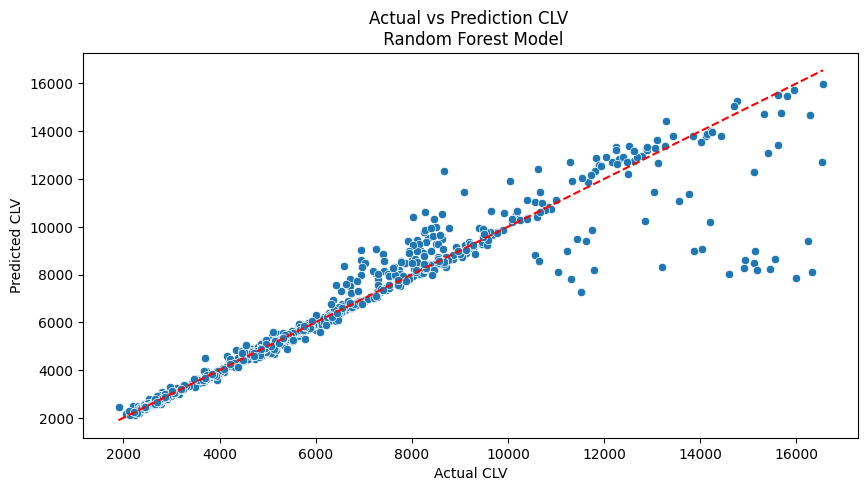

In [42]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=ytest, y=y_pred_rf_tuning)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='red', linestyle='--')  # Garis merah
plt.title('Actual vs Prediction CLV \n Random Forest Model')
plt.xlabel('Actual CLV')
plt.ylabel('Predicted CLV')

plt.show()

In [43]:
score_r2 = r2_score(ytest,y_pred_rf_tuning)
score_r2

0.899728882714295

Koefisien determinasi (R-squared atau R2) digunakan untuk mengukur sejauh mana model statistik cocok dengan data yang diamati. Nilai R-squared berkisar antara 0 hingga 1 dan digunakan untuk mengukur persentase variasi dalam variabel respons yang dapat dijelaskan oleh model. Semakin tinggi nilai R-squared, semakin baik model memadankan data yang ada.

Model Random Forest memiliki nilai R-squared sekitar 0.8997, yang artinya model tersebut dapat menjelaskan sekitar 89,97% variasi dalam data yang diamati. Ini menunjukkan bahwa model Random Forest secara keseluruhan memiliki kemampuan yang baik dalam menjelaskan hubungan antara variabel input (fitur) dan variabel output (target) dalam dataset yang digunakan.

### **Feature Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (Customer Lifetime Value), kita dapat mengeceknya melalui function feature_importances_.

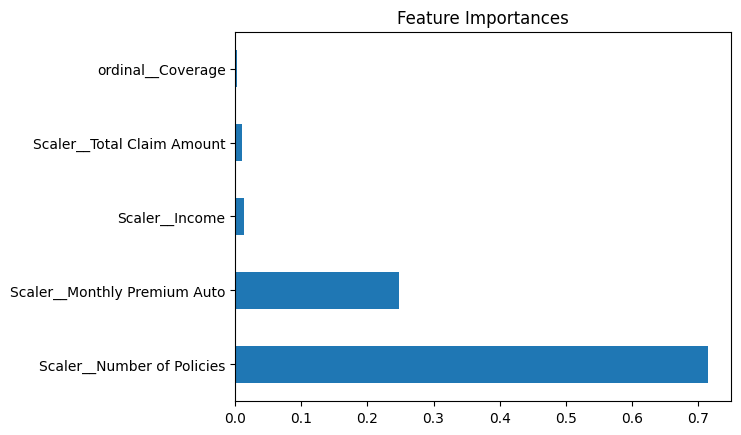

In [44]:
feature_imp = pd.Series(rf_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head(5)
feature_imp.plot(kind='barh', title='Feature Importances');

Dalam analisis model yang telah dilakukan, ditemukan bahwa fitur `Number of Policies` dan `Monthly Premium Auto` adalah fitur yang memiliki pengaruh paling signifikan terhadap `Customer Lifetime Value`. Hasil ini sejalan dengan asumsi awal bahwa kedua fitur tersebut memiliki korelasi positif yang paling kuat dengan `Customer Lifetime Value`. Dengan demikian, kita dapat mengonfirmasi bahwa dalam konteks model ini, `Number of Policies` dan `Monthly Premium Auto` adalah faktor yang paling kuat dalam memengaruhi `Customer Lifetime Value`

## **Conclusion**

Pada proses benchmarking menunjukkan bahwa Gradient Boost adalah model terbaik berdasarkan nilai RMSE dan MAE. Sedangkan jika dari nilai MAPE, RandomForest memiliki nilai paling baik dari delapan model. setelah dilakukan parameter tuning model Random Forest secara akumlatif lebih baik daripada Gradien Boost dengan meninjau nilai MAE dan MAPEnya. dengan Error Random Forest sebesar 4.27%

Dalam analisis model, konfirmasi ditemukan bahwa dalam model ini, Number of Policies dan Monthly Premium Auto memiliki pengaruh terbesar terhadap Customer Lifetime Value, sesuai dengan asumsi awal bahwa kedua fitur tersebut memiliki korelasi positif yang kuat dengan CLV.


## **Rekomendasi**


1. Perusahaan dapat gunakan model ML untuk mengidentifikasi segmen pelanggan yang berbeda berdasarkan CLV mereka. Ini memungkinkan perusahaan untuk menyesuaikan strategi pemasaran, penawaran, dan layanan untuk masing-masing segmen. seperti hasil analisis bahwa "Number of Policies" dan "Monthly Premium Auto" adalah fitur yang signifikan, perusahaan dapat menggunakan informasi ini untuk melakukan segmentasi pelanggan. Misalnya, pelanggan dengan jumlah kebijakan yang tinggi dan premi bulanan yang rendah mungkin dianggap pelanggan berharga tinggi, dan perusahaan dapat menargetkan strategi pemasaran khusus untuk segmen ini.
2. Dengan pemahaman yang lebih baik tentang faktor-faktor yang memengaruhi CLV, perusahaan dapat menyesuaikan strategi pemasaran mereka. Mereka dapat menargetkan pelanggan yang memiliki potensi CLV tinggi dengan penawaran dan promosi khusus, serta meningkatkan retensi pelanggan melalui tawaran yang disesuaikan.
3. Menggunakan wawasan dari model ML untuk menyesuaikan tarif asuransi. Jika "Number of Policies" dan "Monthly Premium Auto" memiliki pengaruh signifikan, maka perusahaan dapat mempertimbangkan untuk menyesuaikan tarif berdasarkan faktor-faktor ini.
4. Mencari data tambahan untuk menambah pertimbangan model dalam menentukan nilai CLV

In [45]:
# Save Model
import pickle

rf_tuning.fit(xtrain,ytrain)

pickle.dump(rf_tuning,open('CLV prediction Best MOodel.sav','wb'))